Link download dataset : https://drive.google.com/drive/folders/1iwDloQyUBJEH6MNrr0BJJObXx0HBVSqT?usp=sharing

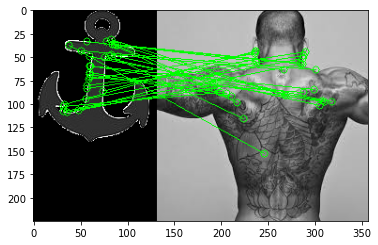

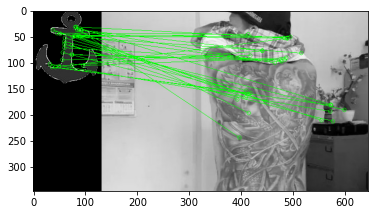

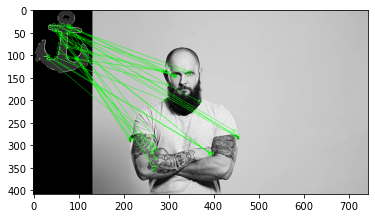

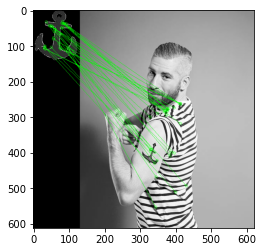

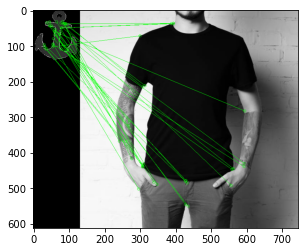

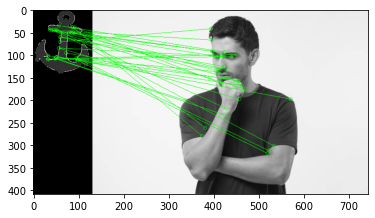

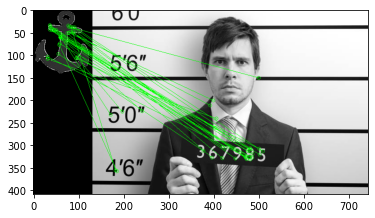

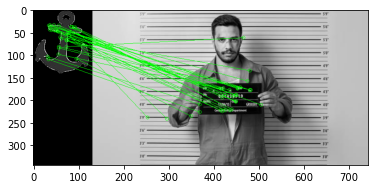

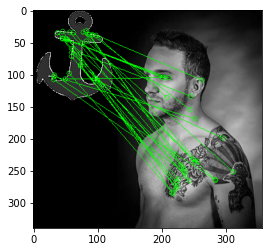

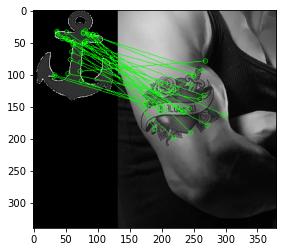

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]
    
    # Create a new output image that concatenates the two images together
    output_img = np.zeros((max([rows1,rows2]), cols1+cols2, 3), dtype='uint8')
    output_img[:rows1, :cols1, :] = np.dstack([img1, img1, img1])
    output_img[:rows2, cols1:cols1+cols2, :] = np.dstack([img2, img2, img2])
    
    # Draw connecting lines between matching keypoints
    for match in matches:
        # Get the matching keypoints for each of the images
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt
        
        # Draw a small circle at both co-ordinates and then draw a line
        radius = 4
        colour = (0,255,0) # green
        thickness = 1
        cv2.circle(output_img, (int(x1),int(y1)), radius, colour, thickness)
        cv2.circle(output_img, (int(x2)+cols1,int(y2)), radius, colour, thickness)
        cv2.line(output_img, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), colour, thickness)
    return output_img

if __name__=='__main__':
    query_img = cv2.imread('gambar/tato/tatokriminalT2.png')
    query_img_gray = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
    
    orb = cv2.ORB_create() 
        
    keypoints1, descriptors1 = orb.detectAndCompute(query_img_gray, None)
    
    i = 1
    while(i <= 10) :
        train_img = cv2.imread("gambar/tato/tersangkaT2-" + str(i) + ".jpg")
        train_img_gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
    
        keypoints2, descriptors2 = orb.detectAndCompute(train_img_gray, None)
    
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key = lambda x:x.distance)
        
        result = draw_matches(query_img_gray, keypoints1, train_img_gray, keypoints2, matches[:30])

        plt.imshow(result),plt.show()
        i+=1